## Temperatur og CO2 lokalt og globalt

------------------
Målet med oppgaven er å gi en intro til hvordan man kan jobbe med data i Python. Vi bruker data over temperatur og CO2 til å gå gjennom: 
- **Innlasting av data** 💾
- **Bruk av bibliotek** 📖
- **Bruk av funksjoner** 🎯
- **Strukturere variabler** 🗃️
- **Visualisering** 🎨

Casene vi ser på er:
- Temperaturanomalier fra Bergen og globalt
- Trendlinjer for ulike tidsperioder
- Anomalier i global CO2 i atmosfæren. 
- Ulike måter å presentere og sammenligne data på. 

Vi bruker fire datasett:
- Temperaturdata for Bergen: [last ned her](https://github.com/irendundas/EkteData/blob/main/data/Bergen_temp1862_2022.txt). Dette datasettet er kompilert av Helge Drange basert på data fra Meteorologisk institutt. 
- Temperaturdata globalt: [last ned her](https://climate.metoffice.cloud/temperature.html#datasets) (bla ned til "Get the data" og last ned HadCRUT5, NOAAGlobalTemp, eller GISTEMP. I eksempelet her bruker jeg HadCRUT5). 
- CO2 data frem til 2004 (NOAA): [last ned her](https://www1.ncdc.noaa.gov/pub/data/paleo/icecore/antarctica/law/law2006.txt). Disse datene er basert på iskjerner. Datasettet har mye informasjon vi ikke trenger, vi laster det inn på en ryddig måte ca halvveis i oppgaven. 
- CO2 data fra 1959 frem til idag (NOAA): [last ned her](https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_annmean_mlo.txt) 

Temperaturstripe-figurene i denne oppgaven er inpirert av [Ed Hawkins sin figur](https://www.wfla.com/wp-content/uploads/sites/71/2022/06/PAGES2K-ED-HAWKINS-CLIMATE-STRIPES.jpg?w=900)

________________

*Vår Dundas, stipendiat i fysisk oseanografi, Geofysisk Institutt, UiB*


In [6]:
# Last inn bibliotekene du trenger 📖

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap

In [7]:
SMALL_SIZE = 13
MEDIUM_SIZE = 17
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Del 1: Temperatur
I denne delen ser vi på temperatur-anomalier. Dette betyr at vi ser på temperaturavvik i forhold til en satt referanseperiode. For HadCRUT5 er referanseperioden 1961–1990 ([Morice et al., 2020](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2019JD032361)).

### Last inn datasett over global temperatur 
Følg denne [lenken](https://climate.metoffice.cloud/temperature.html#datasets) og last ned et av datasettene under **Global mean temperature**. Pass på at du lagrer filen på et logisk sted. 
Under bruker jeg datasettet fra HadCRUT5.
Last så datasettet over global temperatur inn i Python. Vi bruker biblioteket Pandas. Dette biblioteket er supert for data i 2D. Skal du laste inn data med flere dimensjoner er biblioteket "xarray" supert. Veldig mye av funksjonaliteten er lik, men spesialisert på flere dimensjoner.

In [8]:
# Spesifiser hvilken fil du vil laste inn og hvor på PCen din den ligger. 💾

# Endre denne stien til der du lastet ned filen med Global temperatur på din PC
# NB: skråstrekene skal være '/' IKKE '\'. På Windows er de automatisk feil vei - pass på at de er '/'. 
# Bruker du Mac eller Linux er skråstrekene automatisk riktig vei. 
# sti='W:/Work/Documents/EkteData/ikkeGit/temperaturstriper'
fil='/gmt_HadCRUT5.csv'

# Pass på at resultatet av sti+fil er nøyaktig det samme som der filen
# faktisk ligger på PCen din. 
# sti+fil
fil

'W:/Work/Documents/EkteData/ikkeGit/temperaturstriper/gmt_HadCRUT5.csv'

Se [her](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) for forklaring på keywordene (sep, index_col etc).

For å vite hvilke keyword arguments (**kwargs i dokumentasjonen) du skal bruke og oppgi må du vite hvordan filen din ser ut. Jeg pleier alltid å åpne filen i for eksempel notepad for å inspisere hvordan kolonner er inndelt, hva som er desimaltegn, om det er en header etc. Det hjelper ikke å åpne filen i excel - da ser du ikke denne informasjonen. 

In [11]:
# Her laster du inn datasettet 💾
df = pd.read_csv(
    sti+fil, 
    # fil, 
    sep=',', 
    decimal='.', 
    index_col=False, 
    header=4,
    skipinitialspace=True # Skip spaces after delimiter.
)

# From the doc: index_col=False can be used to force pandas to not use the 
# first column as the index, e.g. when you have a malformed file with 
# delimiters at the end of each line.

In [13]:
# Print ut datasettet for å se hvordan det ser ut. 
df

,Year,HadCRUT5 (degC),HadCRUT5 uncertainty
0,1850,-0.08,0.172
1,1851,0.11,0.179
2,1852,0.11,0.180
3,1853,0.07,0.160
4,1854,0.05,0.141
...,...,...,...
169,2019,1.23,0.034
170,2020,1.26,0.035
171,2021,1.10,0.036
172,2022,1.14,0.036


In [14]:
# 🗃️
# Lag en "dictionary" for tid og temperatur for å slippe å holde styr på så mange 
# variabler når vi etterpå laster inn tid og temp for Bergen også.
tid, temp={},{}

In [15]:
tid

{}

In [16]:
# Gi den første kolonnen (iloc[:,0]) til "tid" og den andre kolonnen (iloc[:,1]) til "temp" 🗃️
tid['Global']=np.copy(df.iloc[:,0])
temp['Global']=np.copy(df.iloc[:,1])

In [18]:
temp

{'Global': array([-0.08,  0.11,  0.11,  0.07,  0.05,  0.04,  0.02, -0.13, -0.05,
         0.06, -0.05, -0.09, -0.2 , -0.  , -0.13,  0.01, -0.  , -0.02,
        -0.01,  0.02,  0.01, -0.03,  0.01, -0.  , -0.03, -0.04, -0.08,
         0.24,  0.33,  0.04,  0.02,  0.11,  0.04, -0.01, -0.15, -0.13,
        -0.08, -0.16, -0.04,  0.09, -0.17, -0.06, -0.17, -0.15, -0.14,
        -0.11,  0.06,  0.08, -0.15, -0.02,  0.11,  0.05, -0.1 , -0.19,
        -0.26, -0.07,  0.02, -0.16, -0.17, -0.2 , -0.19, -0.2 , -0.14,
        -0.13,  0.08,  0.15, -0.08, -0.2 , -0.08,  0.01,  0.04,  0.1 ,
         0.  ,  0.02,  0.03,  0.06,  0.22,  0.11,  0.13, -0.05,  0.16,
         0.24,  0.19,  0.02,  0.17,  0.13,  0.17,  0.32,  0.33,  0.3 ,
         0.42,  0.38,  0.34,  0.35,  0.48,  0.38,  0.22,  0.25,  0.22,
         0.2 ,  0.11,  0.28,  0.36,  0.42,  0.22,  0.14,  0.08,  0.3 ,
         0.32,  0.29,  0.22,  0.32,  0.28,  0.3 ,  0.03,  0.14,  0.19,
         0.22,  0.17,  0.31,  0.26,  0.13,  0.25,  0.39,  0.17,  0.

In [ ]:
temp

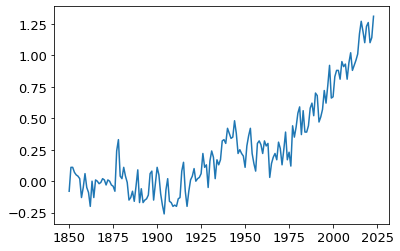

In [19]:
# Lag en figur for å få et intrykk av datasettet 🎨
plt.plot(tid['Global'], temp['Global'])

### Last inn datasettet over temperatur i Bergen
Du finner datasettet [her](github.com/irendundas/EkteData/blob/main/data/Bergen_temp1862_2022.txt).


In [24]:
# 💾
sti='W:/Work/Documents/EkteData/EkteData/data'
fil='/Bergen_temp1862_2022.txt'

# "Keyword arguments" her er litt annerledes enn over fordi datasettet fra Bergen er litt
# annerledes enn det Globale datasettet.
df = pd.read_csv(
    sti+fil, 
    sep=' ', 
    decimal='.', 
    index_col=False, 
    header=4,
    skipinitialspace=True 
)

In [25]:
df

,Year,null,temp,anomaly
0,1862,0,7.76,0.13
1,1863,0,7.78,0.15
2,1864,0,6.91,-0.72
3,1865,0,7.28,-0.35
4,1866,0,7.45,-0.18
...,...,...,...,...
155,2018,0,8.74,1.11
156,2019,0,8.85,1.23
157,2020,0,9.46,1.83
158,2021,0,8.50,0.88


In [26]:
# Lagre tid og temperatur som egne variabler i "dictionaryene" tid og temp: 🗃️

tid['Bergen']=np.copy(df.iloc[:,0])
# Vi vil se på anomalier, så vi setter den tredje kolonnen til temp['Bergen']
temp['Bergen']=np.copy(df.iloc[:,3]) 

In [27]:
tid

{'Global': array([1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860,
        1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871,
        1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882,
        1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893,
        1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904,
        1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915,
        1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926,
        1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937,
        1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948,
        1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
        1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
        1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
        1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
        1993, 1994, 1995, 19

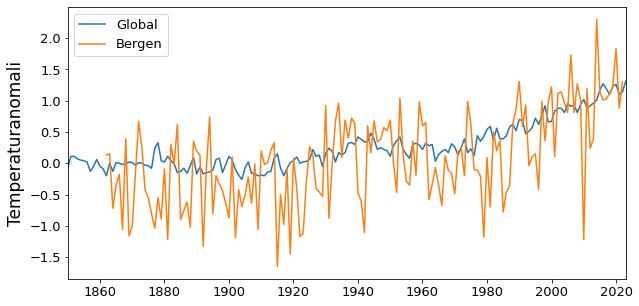

In [28]:
# Plot både global og Bergen sin temperatur i samme figur 🎨
plt.figure(figsize=(10,5))

plt.plot(tid['Global'], temp['Global'], label='Global')
plt.plot(tid['Bergen'], temp['Bergen'], label='Bergen')
plt.legend()
plt.ylabel('Temperaturanomali')
plt.xlim([1850,2023])
plt.show()

**Spørsmål**

- Hvorfor varierer temperaturanomaliene så mye mer fra år til år i Bergen enn globalt? 
- Hvorfor er variabiliteten likevel så lik over lang tid?

_____________
## Del 2: Trend - langtidsvariasjonen i Bergen: 

**NB! For lærernes dag og MAT625 26. januar: Kjør raskt gjennom cellene frem til der det står "Beskriver et andregradspolynom utviklingen av temperatur bedre?" uten å gjøre oppgavene.** 

Legg på tre trendlinjer. F.eks.:
- En for hele datasettet, 
- en for perioden fra jeg er født til idag, og
- en for perioden fra dere er født (ca 1970?) til idag.


In [29]:
tid['Bergen']

array([1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1872, 1873,
       1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884,
       1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895,
       1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906,
       1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917,
       1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928,
       1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939,
       1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950,
       1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 20

In [36]:
np.where(tid['Bergen']==1970)[0][0]

107

In [37]:
tid['Bergen'][107]

1970

In [38]:
# Finn indeksen til år 1994, og 1970 🎯
id94=np.where(tid['Bergen']==1994)[0][0]
id70=np.where(tid['Bergen']==1970)[0][0]

# Sjekk at indeksene vi har funnet stemmer
tid['Bergen'][id94], tid['Bergen'][id70]

(1994, 1970)

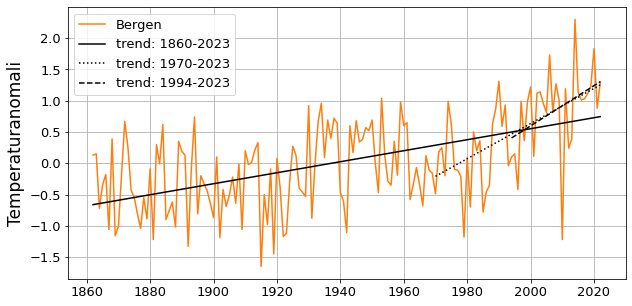

In [39]:
# 🎨
plt.figure(figsize=(10,5))
# Hele tidsserien
plt.plot(tid['Bergen'], temp['Bergen'], 'C1', label='Bergen') 
# trenden til hele tidsserien 🎯
a, b = np.polyfit(tid['Bergen'], temp['Bergen'], 1) 
plt.plot(tid['Bergen'], a*tid['Bergen'] + b, 'k', label='trend: 1860-2023')
 # trenden siden 1970
a, b = np.polyfit(tid['Bergen'][id70:], temp['Bergen'][id70:], 1)
plt.plot(
    tid['Bergen'][id70:], a*tid['Bergen'][id70:] + b, 
    'k', label='trend: 1970-2023', ls=':'
)
# trenden siden 1994
a, b = np.polyfit(tid['Bergen'][id94:], temp['Bergen'][id94:], 1) 
plt.plot(
    tid['Bergen'][id94:], a*tid['Bergen'][id94:] + b, 
    'k', label='trend: 1994-2023', ls='--'
)

plt.legend()
plt.ylabel('Temperaturanomali')

plt.grid()
plt.show()

In [40]:
a, b = np.polyfit(tid['Bergen'], temp['Bergen'], 1) # trenden til hele tidsserine
x=(a*tid['Bergen'][-1] + b)-(a*tid['Bergen'][0] + b)
x="{:.1f}".format(x) # Skriv bare ut en desimal. 🎯

print(
    'Trenden indikerer at for hele perioden har temperaturen i Bergen økt med ', 
    x, 'grader'
)

Trenden indikerer at for hele perioden har temperaturen i Bergen økt med  1.4 grader


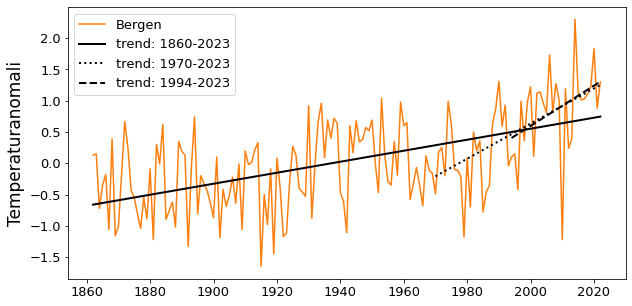

In [41]:
# Plottingen av figuren over blir ryddigere med en for-løkke 🎯🎨
plt.figure(figsize=(10,5))

plt.plot(tid['Bergen'], temp['Bergen'], 'C1', label='Bergen')

idt=[0, id70, id94]
labels=['trend: 1860-2023', 'trend: 1970-2023', 'trend: 1994-2023']
ls=['-', ':', '--'] # Linestyle
for count,start in enumerate(idt):
    a, b = np.polyfit(tid['Bergen'][start:], temp['Bergen'][start:], 1)   
    plt.plot(
        tid['Bergen'][start:], a*tid['Bergen'][start:] + b, 
        'k', label=labels[count], lw=2, ls=ls[count]
    )
plt.ylabel('Temperaturanomali')
plt.legend()
plt.show()


In [44]:
for count,i in enumerate(idt):
    print(count,i)

0 0
1 107
2 131


**Spørsmål**
- Hva er forskjellen på trendlinjene?
- Hva skjer med trendlinjene når startdatoen for beregningsperioden øker? 
- Hva betyr dette fysisk?

**Kan du stole på trendlinjene?**
- Beregn trenden for de to periodene 1977-2000 og 1990-2013. 
- Anta at begge trendene representerer endringen i temperatur for Bergen for de 160 årene vi har med data. 
    - I følge trend nr 1, hvor mye har temperaturen endret seg de siden starten av tidsserien?
    - Hva med i følge trend nr 2?
- Forskjellen er stor! Vær alltid obs på om trender du presenterer (eller får presentert) er robuste! Trender bør ikke være sterkt påvirket av valg av start og slutt. 


endring de siste 160 årene:  0.5975652173912614 grader
endring de siste 160 årene:  8.178086956522076 grader


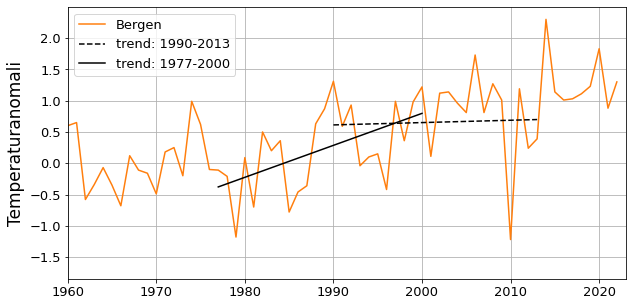

In [45]:
# 🎨
plt.figure(figsize=(10,5))
# Hele tidsserien
plt.plot(tid['Bergen'], temp['Bergen'], 'C1', label='Bergen') 
id1=np.where(tid['Bergen']==1990)[0][0]
id2=np.where(tid['Bergen']==2013)[0][0]+1
# trenden siden 1970
a, b = np.polyfit(tid['Bergen'][id1:id2], temp['Bergen'][id1:id2], 1)
print('endring de siste 160 årene: ', a*160, 'grader')
plt.plot(
    tid['Bergen'][id1:id2], a*tid['Bergen'][id1:id2] + b, 
    'k', label='trend: 1990-2013', ls='--'
)
id1=np.where(tid['Bergen']==1977)[0][0]
id2=np.where(tid['Bergen']==2000)[0][0]+1
# trenden siden 1994
a, b = np.polyfit(tid['Bergen'][id1:id2], temp['Bergen'][id1:id2], 1)
print('endring de siste 160 årene: ', a*160, 'grader')
plt.plot(
    tid['Bergen'][id1:id2], a*tid['Bergen'][id1:id2] + b, 
    'k', label='trend: 1977-2000', ls='-'
)

plt.legend()
plt.ylabel('Temperaturanomali')
plt.xlim(1960, 2023)
plt.grid()
plt.show()


_____________
### Beskriver et andregradspolynom utviklingen av temperatur bedre? 

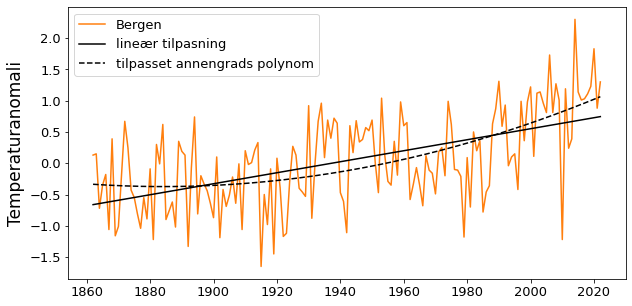

In [51]:
# 🎨
plt.figure(figsize=(10,5))
plt.plot(tid['Bergen'], temp['Bergen'], 'C1', label='Bergen')
# trenden til hele tidsserine
a, b = np.polyfit(tid['Bergen'], temp['Bergen'], 1) # 🎯
plt.plot(tid['Bergen'], a*tid['Bergen'] + b, 'k', label='lineær tilpasning', ls='-')
# Andregrads polynom tilpasset dataene
a, b, c = np.polyfit(tid['Bergen'], temp['Bergen'], 2) 
plt.plot(
    tid['Bergen'], 
    a*tid['Bergen']**2 + b*tid['Bergen'] + c, 
    'k', label='tilpasset annengrads polynom', ls='--'
)
plt.ylabel('Temperaturanomali')
plt.legend()
plt.show()

**Spørsmål**
- Hva slags informasjon får vi av andregradspolynomet som vi ikke fikk av den lineære trendlinjen over hele tidsserien? 

**Oppgave: Hva med trenden til den globale temperaturanomalien?**
- Beregn trendlinjen for den globale tidsserien. 
- Plot trendlinjen globalt og for Bergen i samme figur for å sammeligne dem lettere. 
- Tips: start tidsseien i 1862 for at tidsseriene skal stemme overens. 

In [52]:
tid['Bergen'][0], tid['Global'][0]

(1862, 1850)

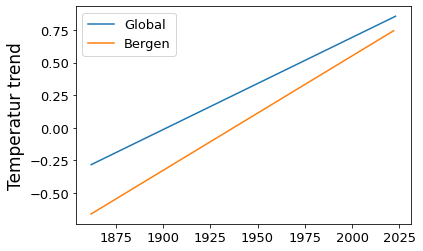

In [53]:
id62=np.where(tid['Global']==1862)[0][0] # 🎯

a, b = np.polyfit(tid['Global'][id62:], temp['Global'][id62:], 1)   
plt.plot(tid['Global'][id62:], a*tid['Global'][id62:] + b, label='Global')

a, b = np.polyfit(tid['Bergen'], temp['Bergen'], 1)   
plt.plot(tid['Bergen'], a*tid['Bergen'] + b, label='Bergen')
plt.legend()
plt.ylabel('Temperatur trend')

plt.show()

**Spørsmål**
- Hva forteller de lineære trendlinjene oss om den globale temperaturendringen vs temperaturendringen i Bergen?

______________

### Temperaturstriper 🎨
**Plot tidsserien som et histogram med fargene brukt i den originale "temperaturstripe"-figuren laget av [Ed Hawkins](https://www.wfla.com/wp-content/uploads/sites/71/2022/06/PAGES2K-ED-HAWKINS-CLIMATE-STRIPES.jpg?w=900).**

In [54]:
# Fargekart fra den originale tremperaturstripe-figuren 
# med 8 blå og 8 røde farger 🎯
cmap = ListedColormap([
    '#08306b', '#08519c', '#2171b5', '#4292c6',
    '#6baed6', '#9ecae1', '#c6dbef', '#deebf7',
    '#fee0d2', '#fcbba1', '#fc9272', '#fb6a4a',
    '#ef3b2c', '#cb181d', '#a50f15', '#67000d',
])


Notat: I kodecellen under er denne linjen: `color=cmap((temp['Global']+span)/(2*span))`. 
Vi vil at alle temperaturanomalier som er under 0 skal bli blå, og at alle anomalier som er over 0 skal bli røde. 
Det er litt komplisert å forklare hvorfor dette fungerer, og det er heller ikke hovedpoenget med denne oppgaven. Under kommer en kort forklaring, men du må gjerne hoppe over å forstå akkurat denne sammenhengen. 

For å gjøre anomaliene over null røde og anomaliene under null blå normaliserer vi temperaturverdiene mellom 0 og 1. 
De ikke-normaliserte anomaliene i starten av tidsserien er nærme 0. Etter normaliseringen har anomaliene som var 0 blir til 0.5, i.e., midt mellom 0 og 1. Fargene i starten er derfor lyse fordi fargene på midten av vektoren cmap er lyse. Mot slutten av tidsserien er temperaturen godt over 0 (nærme 1 etter normaliseringen), og fargene blir derfor mørkerøde. 
Variabelen `max_anomaly` er den største temperatur-anomalien. Ved å bruke denne verdien til å normalisere får den største anomalien i plottet vårt den mørkeste røde fargen. 



In [55]:
max_anomaly=max(temp['Global']) # 🎯

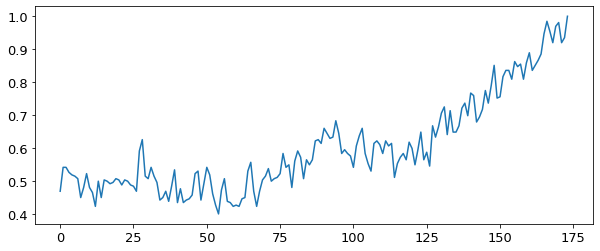

In [56]:
# Denne figuren viser at anomalier nærme 0 blir 0.5, mens max-anomaliene blir 1. 🎨
# Hvis det fantes negative anomalier som var like sterke som den positive ville disse blitt 0. 
fig, ax=plt.subplots(1, 1, figsize=(10, 4))
plt.plot((temp['Global']+max_anomaly)/(2*max_anomaly))


(-2.0, 2.4)

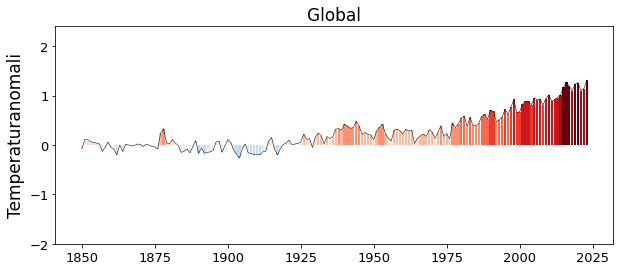

In [57]:
# 🎯🎨
fig, ax=plt.subplots(1, 1, figsize=(10, 4))
plt.bar(
    tid['Global'], temp['Global'], 
    color=cmap((temp['Global']+max_anomaly)/(2*max_anomaly)) #normalize data values to the range [0, 1]
) 
    
plt.plot(tid['Global'], temp['Global'], 'k', linewidth=0.5)
plt.ylabel('Temperaturanomali')
plt.title('Global')
plt.ylim(-2, 2.4)

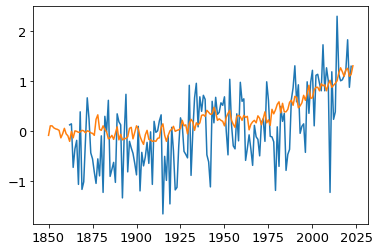

In [58]:
plt.plot(tid['Bergen'], temp['Bergen'])
plt.plot(tid['Global'], temp['Global'])

Text(0.5, 1.0, 'Bergen')

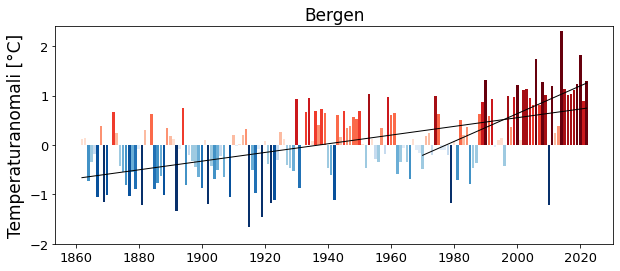

In [59]:
# 🎯🎨
fig, ax=plt.subplots(1, 1, figsize=(10, 4))
plt.bar(tid['Bergen'], temp['Bergen'], color=cmap((temp['Bergen']+max_anomaly)/(2*max_anomaly)))
plt.ylim(-2, 2.4)

# Legg til trendlinjer fra tidligere
idt=[0, id70]
for count,start in enumerate(idt):
    a, b = np.polyfit(tid['Bergen'][start:], temp['Bergen'][start:], 1)   
    plt.plot(
        tid['Bergen'][start:], a*tid['Bergen'][start:] + b, 
        'k', linewidth=1
    )
plt.ylabel('Temperaturanomali [°C]')
plt.title('Bergen')


In [65]:
temp['Bergen']<-1

array([False, False, False, False, False,  True, False,  True,  True,
       False, False, False, False, False,  True, False, False, False,
        True, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False,  True, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [63]:
temp['Bergen'][temp['Bergen']<-1]

array([-1.06, -1.16, -1.01, -1.04, -1.22, -1.02, -1.33, -1.19, -1.06,
       -1.65, -1.45, -1.17, -1.12, -1.11, -1.18, -1.22])

In [64]:
tid['Bergen'][temp['Bergen']<-1]

array([1867, 1869, 1870, 1877, 1881, 1888, 1892, 1902, 1909, 1915, 1919,
       1922, 1923, 1942, 1979, 2010], dtype=int64)

________________________
### Del 3: CO2 i atmosfæren 💾

Temperatur er knyttet til CO2 i atmosfæren via drivhuseffekten som påvirker den globale strålingsbalansen. Dette blir tydelig dersom vi plotter temperaturanomaliene i samme figur som CO2.

Vi må bruke to datasett over CO2 og sette dem sammen. Begge er tilgjengelig via NOAA. Det ene datasette er fra Law station i Antarktis og er basert på iskjerner. Dette datasettet slutter i 2004. Det andre datasetter er fra Mauna Loa og starter i 1959. 

In [66]:
# Last inn datasettet over CO2 fra iskjerner tatt i Antarktis (1832-2004) 💾
# Tips: Hvis du har windows (som meg) kan man slippe å bytte ut alle skråstrekene om man putter en 'r' foran. 
# sti=r'W:\Work\Documents\EkteData\ikkeGit\temperaturstriper'
fil='LawCO2.txt'

df = pd.read_csv(
    fil, 
    delim_whitespace=True,
    decimal='.', 
    index_col=False, 
    skiprows=2013,
    skipfooter=3676-2187,
    engine='python'
)

# Spesifiser at årene skal lastes inn som dato. 

In [68]:
# 🗃️
tidco2_law=np.copy(df.iloc[:,0])
co2_law=np.copy(df.iloc[:,5])

Text(0, 0.5, 'CO2')

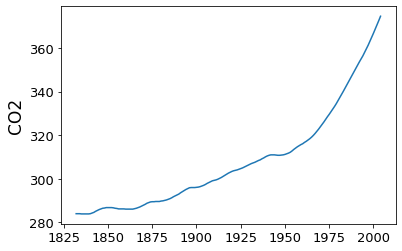

In [69]:
# 🎨
plt.plot(tidco2_law, co2_law)
plt.ylabel('CO2')

In [74]:
# Last inn datasettet over CO2 fra instrumentelle målinger (1959-) 💾
fil='/MaunaLoa_CO2.txt'

df = pd.read_csv(
    sti+fil, 
    sep=' ', 
    decimal='.', 
    skipinitialspace=True,
    skiprows=55
)

In [75]:
# 🗃️
tidco2_noaa=np.copy(df.iloc[:,0])
co2_noaa=np.copy(df.iloc[:,1])

Text(0, 0.5, 'CO2')

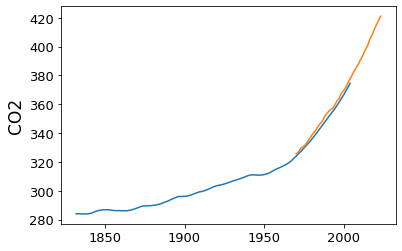

In [76]:
# 🎨
plt.plot(tidco2_law, co2_law)
plt.plot(tidco2_noaa, co2_noaa)
plt.ylabel('CO2')


In [77]:
print('Datasettene overlapper. Datasettet fra Law slutter i ',tidco2_law[-1], 'mens datasettet fra NOAA starte i ', tidco2_noaa[0])

Datasettene overlapper. Datasettet fra Law slutter i  2004 mens datasettet fra NOAA starte i  1970


In [78]:
# 🗃️ 🎯
# For å sette datasettene sammen bruker vi gjennomsnittet av de to kildene i perioden som overlapper. 
# Vi lager to nye variabler: tidco2 og co2
tidco2=np.arange(tidco2_law[0], tidco2_noaa[-1]+1, 1)

In [79]:
# Et array som vi kan fylle med CO2-data 🗃️ 🎯
# Gi denne to kolonner slik at vi kan fylle inn data fra Law i den ene kolonnen og data fra Law i den andre.
# Men: la dem ha samme tidsvektor og fyll inn med nan der de to respektive CO2-tidsseriene ikke har data!
co2=np.nan*np.zeros((len(tidco2),2))

In [80]:
# 🗃️
# Plugg inn data fra Law i kolonne 0
# År 1832 til og med 2004
id2004=np.where(tidco2_law==tidco2_law[-1])[0][0]+1 # +1 på grunn av "til og MED"
co2[:id2004, 0]=co2_law

# Plugg inn data fra NOAA i kolonne 1
# År 1959 til og med 2022 (eller senere avhengig av når du lastet ned dataene)
id1959=np.where(tidco2==tidco2_noaa[0])[0][0]
co2[id1959:, 1]=co2_noaa

# Redefiner variabelen c02 til gjennomsnittet av variabelen co2 🎯
co2=np.nanmean(co2,1)

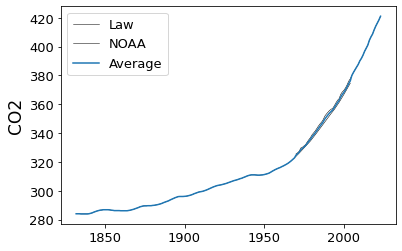

In [81]:
# 🎨
# Plot CO2 fra law og NOAA som tynne svarte linjer i bakgrunnen
plt.plot(tidco2_law, co2_law, 'k', lw=.5, label='Law')
plt.plot(tidco2_noaa, co2_noaa, 'k', lw=.5, label='NOAA')
# Plot CO2 som gjennomsnitt av Law og NOAA på toppen i blått 
# for å sjekke at estimatet ditt er fornuftig. 
plt.plot(tidco2, co2, label='Average')
plt.ylabel('CO2')
plt.legend()



_____________________________
### Alt oppsummert: 
Lag en figur med temperaturstriper, andre ordens tilpasset polynom og globalt CO2-nivå.

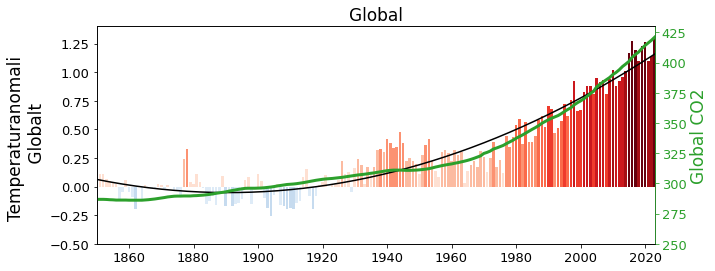

In [82]:
# 🎨
fig, ax=plt.subplots(1, 1, figsize=(10, 4))
ax.bar(
    tid['Global'], temp['Global'], 
    color=cmap((temp['Global']+max_anomaly)/(2*max_anomaly)) #normalize data values to the range [0, 1]
) 
plt.title('Global')
ax.set_ylim(-0.5, 1.4)

# Legg til trendlinjer fra tidligere
a = np.polyfit(tid['Global'], temp['Global'], 2)   
ax.plot(
    tid['Global'], a[0]*tid['Global']**2 
    + a[1]*tid['Global'] + a[2], 
    'k'
)
ax.set_ylabel('Temperaturanomali \n Globalt')
    
# Legg til global CO2
ax2=ax.twinx()
ax2.plot(tidco2, co2, 'C2', linewidth=3)
# Tilpass aksene i figuren for å vise informasjonen tydeligere
ax2.set_ylim(250, 430)
ax2.spines['right'].set_color('C2')
ax2.tick_params(axis='y', colors='C2')
ax2.yaxis.label.set_color('C2')
ax2.set_ylabel('Global CO2')


plt.xlim(tid['Global'][0], tid['Global'][-1])
plt.show()

#### Ærlig visualisering
Nå har vi justert grensene til både den høyre og venstre y-aksen slik at de tydelig viser det vi ønsker å formidle, i.e., at temperatur og CO2 henger sammen. Men hva synes du om å tilpasse aksene slik som over?

Det er viktig å være bevisst på at man visualiserer data og resultater på en ærlig måte. Doble y-akser kan være en veldig god måte å vise sammenheng mellom to variabler på, men det kan også være en fallgruve:

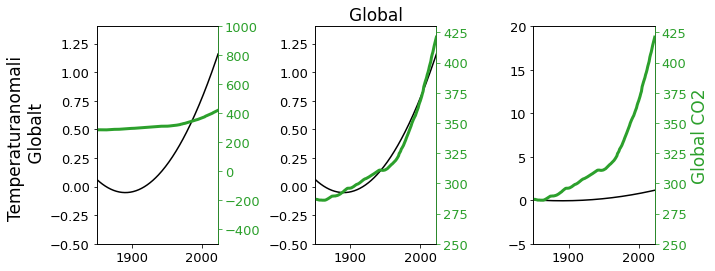

In [83]:
# 🎨
fig, axs = plt.subplots(1, 3, figsize=(10, 4))
ylim=[(-0.5, 1.4), (-0.5, 1.4), (-5, 20)] # ylim for temperature
ylim2=[(-500, 1000), (250, 430), (250, 430)] # ylim for CO2

for count, ax in enumerate(axs):
    ax.set_ylim(ylim[count])

    # Legg til trendlinjer fra tidligere
    a = np.polyfit(tid['Global'], temp['Global'], 2)   
    ax.plot(
        tid['Global'], a[0]*tid['Global']**2 
        + a[1]*tid['Global'] + a[2], 'k'
    )
        
    # Legg til global CO2
    ax2=ax.twinx()
    ax2.plot(tidco2, co2, 'C2', linewidth=3)
    # Tilpass aksene i figuren for å vise informasjonen tydeligere
    ax2.set_ylim(ylim2[count])
    ax2.spines['right'].set_color('C2')
    ax2.tick_params(axis='y', colors='C2')
    ax2.yaxis.label.set_color('C2')


    plt.xlim(tid['Global'][0], tid['Global'][-1])
ax2.set_ylabel('Global CO2')
axs[0].set_ylabel('Temperaturanomali \n Globalt')
axs[1].set_title('Global')
plt.subplots_adjust(wspace=.8)

plt.show()

Inntrykket av sammenhengen mellom CO2 og Temperatur er helt avhengig av hvilke akser vi bruker. En sjekk vi kan gjøre for å se om endringene er sammenlignbare er å se på de normaliserte tidsseriene. Da får vi et mye bedre inntrykk av om endringen er betydelig i forhold til intern variasjon og gjennomsnittsverdi eller ikke. Figuren under viser at endringen i både temperaturtrendene og CO2 er på samme skala. Dette gir oss tiltro til at det er ok å bruke doble tilpassede akser. 

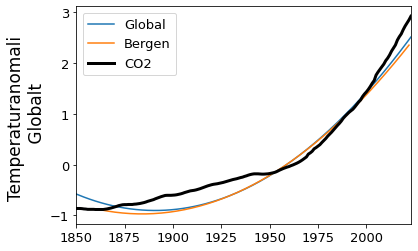

In [84]:
# Normaliserte trendlinjer og CO2 🎨

# Temp
a = np.polyfit(tid['Global'], temp['Global'], 2)   
var=a[0]*tid['Global']**2 + a[1]*tid['Global'] + a[2]
# Normaliser: (var-mean)/std
var=(var-np.mean(var))/np.std(var)
plt.plot(tid['Global'], var, 'C0', label='Global')

a = np.polyfit(tid['Bergen'], temp['Bergen'], 2)   
var=a[0]*tid['Bergen']**2 + a[1]*tid['Bergen'] + a[2]
var=(var-np.mean(var))/np.std(var)
plt.plot(tid['Bergen'], var, 'C1', label='Bergen')

# CO2
var=(co2-np.mean(co2))/np.std(co2)
plt.plot(tidco2, var, 'k', linewidth=3, label='CO2')

plt.xlim(tid['Global'][0], tid['Global'][-1])
plt.ylabel('Temperaturanomali \n Globalt')
plt.legend()

plt.show()

En annen ting å være særlig oppmerksom på er bruk av fargekart: ikke bruk rainbow/hsv/jet, i.e., "Miscellaneous" fargekart! Disse fargekartene har ujevne overganger mellom fargene og skaper et inntrykk av store endringer der det ikke nødvendigvis er sant. 

**Nå som vi er trygg på sammenhengen mellom endring i temperatur og CO2 lager vi samme figur for Bergen**

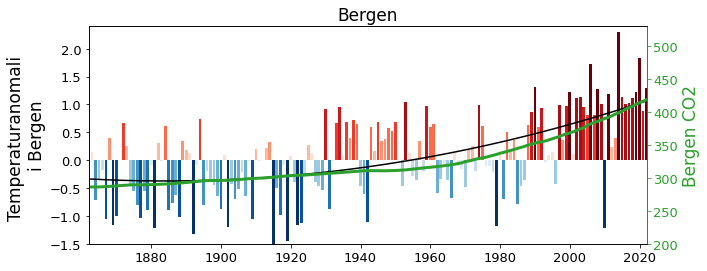

In [85]:
# 🎨
fig, ax=plt.subplots(1, 1, figsize=(10, 4))
ax.bar(
    tid['Bergen'], temp['Bergen'], 
    color=cmap((temp['Bergen']+max_anomaly)/(2*max_anomaly)) #normalize data values to the range [0, 1]
) 
plt.title('Bergen')
ax.set_ylim(-1.5, 2.4)

# Legg til trendlinjer fra tidligere
a = np.polyfit(tid['Bergen'], temp['Bergen'], 2)   
ax.plot(
    tid['Bergen'], a[0]*tid['Bergen']**2 
    + a[1]*tid['Bergen'] + a[2], 'k'
)
ax.set_ylabel('Temperaturanomali \ni Bergen')
    
# Legg til global CO2
ax2=ax.twinx()
ax2.plot(tidco2, co2, 'C2', linewidth=3)
ax2.set_ylim(200, 530)
ax2.spines['right'].set_color('C2')
ax2.tick_params(axis='y', colors='C2')
ax2.yaxis.label.set_color('C2')
ax2.set_ylabel('Bergen CO2')

plt.xlim(tid['Bergen'][0], tid['Bergen'][-1])
plt.show()

**Spørsmål**
- Hva tror du den globale temperaturanomalien vil være i 2040? Hvilke antakelser gjør du for å komme frem til svaret ditt? 
- Hva tror du temperaturanomalien i Bergen vil være i 2040?
- Har du mest tiltro til svaret ditt for Bergen eller globalt? 
